In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import string
from string import digits
import re

import pickle as pkl
import numpy as np
import pandas as pd


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/MINI PROJECT/MOLD_train.tsv', sep='\t')
df1

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NaN,NaN
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NaN,NaN
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NaN,NaN
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NaN,NaN
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NaN,NaN
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,NaN
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
df1[(df1['subtask_a']=="OFF") & (df1['subtask_b']==np.nan)]

,id,tweet,subtask_a,subtask_b,subtask_c


In [ ]:
df1['subtask_b']=df1['subtask_b'].fillna('NOT')
df1

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NOT,NaN
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NOT,NaN
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NOT,NaN
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NOT,NaN
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NOT,NaN
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,NaN
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
train_df=df1
len(train_df)

3103

In [ ]:
df1[(df1['subtask_a']=="OFF") & (df1['subtask_b']=='TIN')& (df1['subtask_c']==np.nan)]

,id,tweet,subtask_a,subtask_b,subtask_c


In [ ]:
len(train_df)

3103

In [ ]:
c=list(train_df['subtask_c'])
temp=[]
for i in range(len(train_df)):
  if((train_df['subtask_a'][i]=='NOT') and (train_df['subtask_b'][i]=='NOT')):
    temp.append('NOT')
  elif((train_df['subtask_a'][i]=='OFF') and (train_df['subtask_b'][i]=='UNT')):
    temp.append("UNT")
  else:
    temp.append(train_df['subtask_c'][i])

In [ ]:
train_df['subtask_c']=temp

In [ ]:
train_df.iloc[[1981]]

,id,tweet,subtask_a,subtask_b,subtask_c
1981,1981,अहो मग आता जेव्हा कंगना नि इतका काही बोलली मुं...,OFF,NOT,NaN


In [ ]:
train_df=train_df.drop(train_df.index[1981])
train_df=train_df.drop(train_df.index[2323])
train_df

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NOT,NOT
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NOT,NOT
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NOT,NOT
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NOT,NOT
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NOT,NOT
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,UNT
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


## Conversion
-	NOT NULL NULL
-	OFF UNT NULL
-	OFF TIN (IND|GRP|OTH)

|||||||||||||||||||||||||||||||||||||||||||

-	NOT NOT NOT
-	OFF UNT UNT
-	OFF TIN (IND|GRP|OTH)

In [ ]:
len(train_df)

3101

In [ ]:
C=list(train_df['subtask_c'])
len(C)

3101

In [ ]:

tempC=[]
for i in C:
  if(i=='NOT'):
    tempC.append(i)
  elif(i=='UNT'):
    tempC.append(i)
  elif(i=='IND'):
    tempC.append(0)
  elif(i=='GRP'):
    tempC.append(1)
  elif(i=='OTH'):
    tempC.append(2)
  else:
    tempC.append('a')

In [ ]:
len(tempC)

3101

In [ ]:
train_df['subtask_c']=tempC

In [ ]:
train_df=train_df[train_df['subtask_c']!='NOT']
train_df=train_df[train_df['subtask_c']!='UNT']
train_df

,id,tweet,subtask_a,subtask_b,subtask_c
1451,1451,राम कदम वागण्यात नाही तर बोलण्यात चुकला बीजेपी...,OFF,TIN,1
1452,1452,हीच का तुमची शिवसेने चि शिकवण आपली आई म्हणजे द...,OFF,TIN,1
1453,1453,हे वाचा गाढवांनो आणि हे ही सांगा की तुमच्या मॅ...,OFF,TIN,1
1454,1454,भक्त आंधळे असतात मूर्खा ना काही कळत नाही,OFF,TIN,1
1455,1455,१९६६ साली छत्रपती शिवाजी महाराज या जागतिक दर्ज...,OFF,TIN,1
...,...,...,...,...,...
3064,3064,@USER @USER हो रे साहेबचा गोट्या,OFF,TIN,2
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,2
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,2
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,2


In [ ]:
#replacing " ' " with an emptyspace
train_df['tweet'] = [re.sub("'",'',str(x)) for x in train_df['tweet']]

In [ ]:
#removing the punctuations
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text

train_df['tweet'] = remove_punc(train_df['tweet'])

In [ ]:
# removing the digits 
train_df['tweet'] = [re.sub("[२३०८१५७९४६]","",x) for x in train_df['tweet']]
#removing emojis from the sentence
train_df['tweet'] = [re.sub("[\u200d]","",x) for x in train_df['tweet']]

In [ ]:
# removing the starting and ending whitespaces
train_df['tweet'] = [x.strip() for x in train_df['tweet']]

In [ ]:
print(df1['tweet'][0]+"\n")
print(df1['tweet'][45]+"\n")
print(df1['tweet'][88]+"\n")

आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगावचे रहिवासी माजी सैनिक सोनू महाजन आले होते २०१६ साली भाजपचे तत्कालीन…

सन २०२० २०२१ या वर्षात मराठा समाजाला नोकऱ्या आणि शैक्षणिक संस्थामध्ये आरक्षणाचा लाभ मिळणार नाही …

म्हणून गप्प आहेत?????? मान…



In [ ]:
# print(train_df['tweet'][0]+"\n")
# print(train_df['tweet'][45]+"\n")
# print(train_df['tweet'][88]+"\n")

In [ ]:
temp_df=train_df
train, test = train_test_split(temp_df, test_size=0.2,random_state=19)
val, test = train_test_split(test, test_size=0.5,random_state=19)

In [ ]:
train

,id,tweet,subtask_a,subtask_b,subtask_c
1588,1588,तुझ्या तोंडात आहेत ना योगीच्या त्या काढ,OFF,TIN,0
1689,1689,हे महाशय निवडूनच आले आहेत ना का उचलून आणले आहे...,OFF,TIN,0
1549,1549,सगळ्यात जास्त बदनामी हे दळभद्री सरकार आणि ह्या...,OFF,TIN,1
1964,1964,अरे दळभद्री पैसे राजाच्या बिनडोक माणसा गुजराथ...,OFF,TIN,0
2293,2293,थाय लंड,OFF,TIN,2
...,...,...,...,...,...
1759,1759,आता तुला आरक्षणाचे साधे फायदे समजत नाहीत हे पा...,OFF,TIN,0
1470,1470,भिकारचोट पत्रकार दलाल आहेत साले,OFF,TIN,1
1805,1805,अरे बापरे तो बावळ…,OFF,TIN,0
2364,2364,अंध भक्त मंद भक्त भक्त। भ…,OFF,TIN,0


In [ ]:
test

,id,tweet,subtask_a,subtask_b,subtask_c
3050,3050,USER केक वरच्या गोट्या संज्या चाटणार की खाणार,OFF,TIN,0
1885,1885,तुजाई तर पुऱ्या घोळक्यात नंगी होती लई आवडत त्य...,OFF,TIN,0
1730,1730,फक्त ब्राह्मण म्हणून त्यांना विरोध करणारे फडणव...,OFF,TIN,0
2286,2286,राजा खुश होत होता तेवढ्यात एक सहा सात वर्षांचा...,OFF,TIN,2
1703,1703,हा माणूस गल्लीतच गोट्या खेळू शकतो ते सुद्धा रड...,OFF,TIN,0
...,...,...,...,...,...
1525,1525,स्त्रियांना समान वागणूक देत नाहीत हे साले भिका...,OFF,TIN,1
1836,1836,या दोघांना ऐकावेळेला घेऊ शकते तु एवढी मोठी तुझ...,OFF,TIN,0
2482,2482,त्या बावळट माळीला बोंबलणे बंद करायला सांगा,OFF,TIN,0
2269,2269,भिकारचोट लेकाचे मिडिया कलाकार सगळे विकले गेले ...,OFF,TIN,2


In [ ]:
val

,id,tweet,subtask_a,subtask_b,subtask_c
1557,1557,यांच्या बुडाला आग लागली महाराजांचे नाव दिले गे...,OFF,TIN,1
1711,1711,कंगनाच्या वाजवल्या झांजा,OFF,TIN,0
1862,1862,मेरे प्यारे पुच्ची पुच्ची मोदी जी आप सिर्फ जनज...,OFF,TIN,0
2365,2365,USER कॉंग्रेस घराणेशाही मुळ मंद लोकांचा पक्ष झ...,OFF,TIN,2
1545,1545,असल्या मंद सैनिकांच्या नादाला लागायचं नाही कर...,OFF,TIN,1
...,...,...,...,...,...
2479,2479,USER बावळट,OFF,TIN,0
2493,2493,USER USER USER च्या तुझी जुनी खोड आहे ही काहीत...,OFF,TIN,0
1890,1890,भाड़ खाव म्हनजेच भाड़ खानार्या लोकांना नाही नो...,OFF,TIN,0
1937,1937,काय रे आई झावाड्या हिजड्या हॉटेल ला काय धंदा क...,OFF,TIN,0


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 8.2 MB/s 
     |████████████████████████████████| 182 kB 49.6 MB/s 
     |████████████████████████████████| 7.6 MB 67.9 MB/s 


In [ ]:
import torch
from transformers import BertTokenizer, BertModel
tokenizers = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
models = BertModel.from_pretrained("bert-base-multilingual-uncased")

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


a


In [ ]:
train_embedings = []
train_labels=[]
ok=0
for i,j in zip(train['tweet'],train['subtask_c']):
  if(ok%500==0):print(ok)
  ok=ok+1
  try:
    encoded_input = tokenizers(i, return_tensors='pt')
    output = models(**encoded_input)
    train_embedings.append(output.last_hidden_state[0][0].detach().numpy())
    train_labels.append(j)
  except:
    continue

0
500


In [ ]:
train_embedings=np.asarray(train_embedings)
train_embedings.shape

(592, 768)

In [ ]:
train_labels=np.asarray(train_labels)
train_labels.shape

(592,)

In [ ]:
test_embedings = []
test_labels=[]
ok=0
for i,j in zip(val['tweet'],val['subtask_c']):
  if(ok%500==0):print(ok)
  ok=ok+1
  try:
    encoded_input = tokenizers(i, return_tensors='pt')
    output = models(**encoded_input)
    test_embedings.append(output.last_hidden_state[0][0].detach().numpy())
    test_labels.append(j)
  except:
    continue

0


In [ ]:
test_embedings=np.asarray(test_embedings)
test_labels=np.asarray(test_labels)

In [ ]:
test_embedings.shape,test_labels.shape

((74, 768), (74,))

In [ ]:
test_labels

array([1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2])

In [ ]:
from keras.utils import to_categorical
test_labels=to_categorical(test_labels)
train_labels=to_categorical(train_labels)

In [ ]:
train_embedings.shape,test_embedings.shape

((592, 768), (74, 768))

In [ ]:
train_labels.shape,test_labels.shape

((592, 3), (74, 3))

In [ ]:
train_embedings=np.reshape(train_embedings,(592,-1,768))
test_embedings=np.reshape(test_embedings,(74,-1,768))

In [ ]:
train_embedings.shape,test_embedings.shape

((592, 1, 768), (74, 1, 768))

In [ ]:
train_labels.shape,test_labels.shape

((592, 3), (74, 3))

In [ ]:
models.config.hidden_size

768

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(LSTM(256,input_dim=768,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               1049600   
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,090,947
Trainable params: 1,090,947
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history3=model.fit(x=train_embedings,y=train_labels,epochs=100,validation_data=(test_embedings,test_labels))

Epoch 1/100
19/19 [==============================] - 2s 30ms/step - loss: 0.9175 - accuracy: 0.6402 - val_loss: 0.8260 - val_accuracy: 0.7162
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 0.8402 - accuracy: 0.6774 - val_loss: 0.7662 - val_accuracy: 0.7162
Epoch 3/100
19/19 [==============================] - 0s 11ms/step - loss: 0.8231 - accuracy: 0.6774 - val_loss: 0.7569 - val_accuracy: 0.7162
Epoch 4/100
19/19 [==============================] - 0s 12ms/step - loss: 0.8089 - accuracy: 0.6774 - val_loss: 0.7494 - val_accuracy: 0.7162
Epoch 5/100
19/19 [==============================] - 0s 12ms/step - loss: 0.7915 - accuracy: 0.6774 - val_loss: 0.7475 - val_accuracy: 0.7162
Epoch 6/100
19/19 [==============================] - 0s 12ms/step - loss: 0.7687 - accuracy: 0.6791 - val_loss: 0.7352 - val_accuracy: 0.7162
Epoch 7/100
19/19 [==============================] - 0s 11ms/step - loss: 0.7570 - accuracy: 0.6993 - val_loss: 0.7296 - val_accuracy: 0.7162
Epoch 

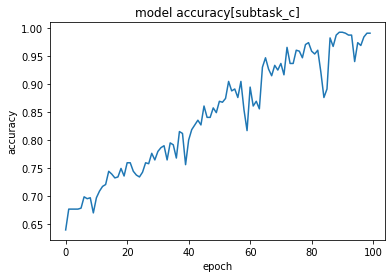

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history3.history['accuracy'])
plt.title('model accuracy[subtask_c]')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Performance

In [ ]:
test_df=test
test_df

,id,tweet,subtask_a,subtask_b,subtask_c
3050,3050,USER केक वरच्या गोट्या संज्या चाटणार की खाणार,OFF,TIN,0
1885,1885,तुजाई तर पुऱ्या घोळक्यात नंगी होती लई आवडत त्य...,OFF,TIN,0
1730,1730,फक्त ब्राह्मण म्हणून त्यांना विरोध करणारे फडणव...,OFF,TIN,0
2286,2286,राजा खुश होत होता तेवढ्यात एक सहा सात वर्षांचा...,OFF,TIN,2
1703,1703,हा माणूस गल्लीतच गोट्या खेळू शकतो ते सुद्धा रड...,OFF,TIN,0
...,...,...,...,...,...
1525,1525,स्त्रियांना समान वागणूक देत नाहीत हे साले भिका...,OFF,TIN,1
1836,1836,या दोघांना ऐकावेळेला घेऊ शकते तु एवढी मोठी तुझ...,OFF,TIN,0
2482,2482,त्या बावळट माळीला बोंबलणे बंद करायला सांगा,OFF,TIN,0
2269,2269,भिकारचोट लेकाचे मिडिया कलाकार सगळे विकले गेले ...,OFF,TIN,2


In [ ]:
def embed_text(text):
  a=[]
  encoded_input = tokenizers(text, return_tensors='pt')
  output = models(**encoded_input)
  a.append(output.last_hidden_state[0][0].detach().numpy())
  a=np.asarray(a)
  b=a.reshape(a.shape[0],-1,a.shape[1])
  return b


In [ ]:
rand_list=[]
for i in test_df['tweet']:
  embeded_tweet=embed_text(i)
  rand_list.append(np.argmax(model.predict(embeded_tweet)))

test_df['LSTM_predicted_output']=rand_list

test_df

1/1 [==============================] - 0s 22ms/step


,id,tweet,subtask_a,subtask_b,subtask_c,LSTM_predicted_output
3050,3050,USER केक वरच्या गोट्या संज्या चाटणार की खाणार,OFF,TIN,0,2
1885,1885,तुजाई तर पुऱ्या घोळक्यात नंगी होती लई आवडत त्य...,OFF,TIN,0,0
1730,1730,फक्त ब्राह्मण म्हणून त्यांना विरोध करणारे फडणव...,OFF,TIN,0,1
2286,2286,राजा खुश होत होता तेवढ्यात एक सहा सात वर्षांचा...,OFF,TIN,2,2
1703,1703,हा माणूस गल्लीतच गोट्या खेळू शकतो ते सुद्धा रड...,OFF,TIN,0,0
...,...,...,...,...,...,...
1525,1525,स्त्रियांना समान वागणूक देत नाहीत हे साले भिका...,OFF,TIN,1,1
1836,1836,या दोघांना ऐकावेळेला घेऊ शकते तु एवढी मोठी तुझ...,OFF,TIN,0,0
2482,2482,त्या बावळट माळीला बोंबलणे बंद करायला सांगा,OFF,TIN,0,0
2269,2269,भिकारचोट लेकाचे मिडिया कलाकार सगळे विकले गेले ...,OFF,TIN,2,1


In [ ]:
ypred2=np.asarray(list(test_df['LSTM_predicted_output']))
ytrue2=np.asarray(list(test['subtask_c']))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytrue2,ypred2))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76        49
           1       0.45      0.56      0.50        16
           2       0.31      0.56      0.40         9

    accuracy                           0.64        74
   macro avg       0.54      0.60      0.55        74
weighted avg       0.71      0.64      0.66        74



## **BiLSTM**

In [ ]:
BILstmmodel = Sequential()
BILstmmodel.add(Bidirectional(LSTM(100, input_shape=(592,1,768), return_sequences=True)))
BILstmmodel.add(Dropout(0.3))
BILstmmodel.add(Bidirectional(LSTM(20)))
BILstmmodel.add(Dropout(0.2))
BILstmmodel.add(Dense(20, activation='relu'))
BILstmmodel.add(Dropout(0.4))
BILstmmodel.add(Dense(3, activation='softmax'))




In [ ]:
BILstmmodel.build((592,1,768))
BILstmmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (592, 1, 200)            695200    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (592, 1, 200)             0         
                                                                 
 bidirectional_3 (Bidirectio  (592, 40)                35360     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (592, 40)                 0         
                                                                 
 dense_5 (Dense)             (592, 20)                 820       
                                                                 
 dropout_5 (Dropout)         (592, 20)                

In [ ]:
BILstmmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=BILstmmodel.fit(x=train_embedings,y=train_labels,epochs=100,validation_data=(test_embedings,test_labels))

Epoch 1/100
19/19 [==============================] - 9s 100ms/step - loss: 0.9181 - accuracy: 0.6318 - val_loss: 0.7919 - val_accuracy: 0.7162
Epoch 2/100
19/19 [==============================] - 0s 15ms/step - loss: 0.8898 - accuracy: 0.6537 - val_loss: 0.8128 - val_accuracy: 0.7162
Epoch 3/100
19/19 [==============================] - 0s 12ms/step - loss: 0.8970 - accuracy: 0.6723 - val_loss: 0.8047 - val_accuracy: 0.7162
Epoch 4/100
19/19 [==============================] - 0s 13ms/step - loss: 0.8593 - accuracy: 0.6740 - val_loss: 0.7718 - val_accuracy: 0.7162
Epoch 5/100
19/19 [==============================] - 0s 13ms/step - loss: 0.8630 - accuracy: 0.6757 - val_loss: 0.7718 - val_accuracy: 0.7162
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.8425 - accuracy: 0.6757 - val_loss: 0.7780 - val_accuracy: 0.7162
Epoch 7/100
19/19 [==============================] - 0s 15ms/step - loss: 0.8413 - accuracy: 0.6757 - val_loss: 0.7506 - val_accuracy: 0.7162
Epoch

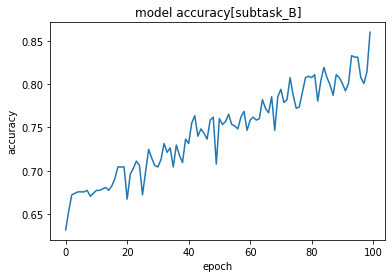

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy[subtask_B]')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
rand_list=[]
for i in test_df['tweet']:
  embeded_tweet=embed_text(i)
  rand_list.append(np.argmax(BILstmmodel.predict(embeded_tweet)))

test_df['BiLSTM_predicted_output']=rand_list

test_df

1/1 [==============================] - 0s 16ms/step


,id,tweet,subtask_a,subtask_b,subtask_c,LSTM_predicted_output,BiLSTM_predicted_output
3050,3050,USER केक वरच्या गोट्या संज्या चाटणार की खाणार,OFF,TIN,0,2,2
1885,1885,तुजाई तर पुऱ्या घोळक्यात नंगी होती लई आवडत त्य...,OFF,TIN,0,0,0
1730,1730,फक्त ब्राह्मण म्हणून त्यांना विरोध करणारे फडणव...,OFF,TIN,0,1,1
2286,2286,राजा खुश होत होता तेवढ्यात एक सहा सात वर्षांचा...,OFF,TIN,2,2,0
1703,1703,हा माणूस गल्लीतच गोट्या खेळू शकतो ते सुद्धा रड...,OFF,TIN,0,0,0
...,...,...,...,...,...,...,...
1525,1525,स्त्रियांना समान वागणूक देत नाहीत हे साले भिका...,OFF,TIN,1,1,1
1836,1836,या दोघांना ऐकावेळेला घेऊ शकते तु एवढी मोठी तुझ...,OFF,TIN,0,0,0
2482,2482,त्या बावळट माळीला बोंबलणे बंद करायला सांगा,OFF,TIN,0,0,0
2269,2269,भिकारचोट लेकाचे मिडिया कलाकार सगळे विकले गेले ...,OFF,TIN,2,1,1


In [ ]:
ypred2=np.asarray(list(test_df['BiLSTM_predicted_output']))
ytrue2=np.asarray(list(test['subtask_c']))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytrue2,ypred2))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        49
           1       0.60      0.75      0.67        16
           2       0.00      0.00      0.00         9

    accuracy                           0.69        74
   macro avg       0.46      0.52      0.48        74
weighted avg       0.65      0.69      0.67        74

